In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [3]:
df = pd.read_csv('clean_resume_data.csv')

In [4]:
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [6]:
df.shape

(2484, 3)

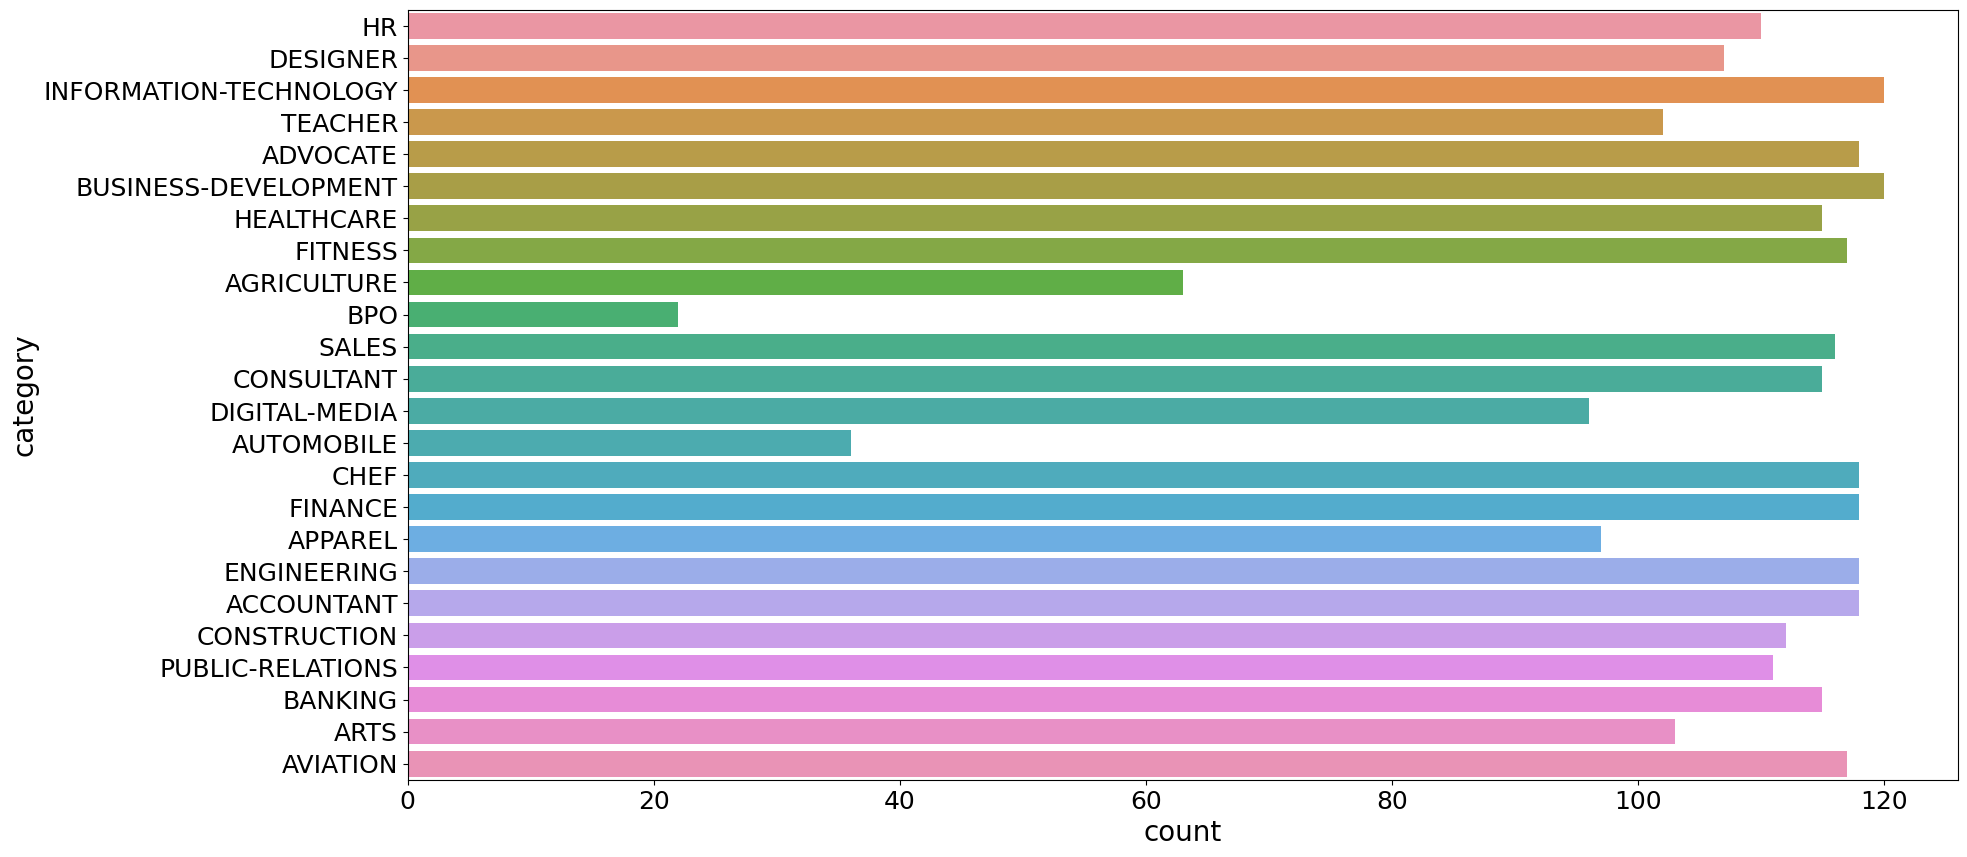

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(y='Category',data=df)
plt.yticks(fontsize = 18)
plt.xticks(fontsize=18)
plt.xlabel('count',fontsize = 20)
plt.ylabel('category',fontsize = 20)
plt.show()

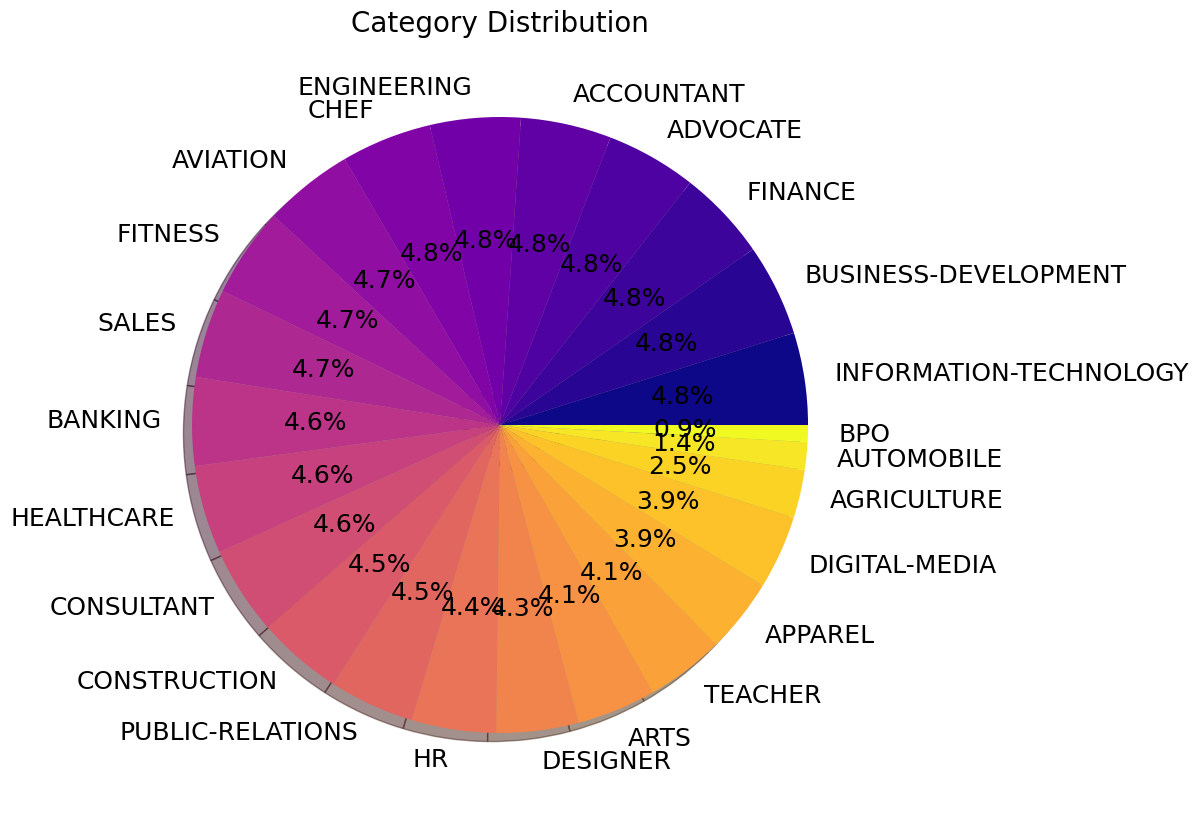

In [13]:
count = df['Category'].value_counts()
label = count.index

plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(
    count,
    labels=label,
    shadow=True,
    autopct='%1.1f%%',
    colors=plt.cm.plasma(np.linspace(0, 1, len(count)))
)

# Set font size
for text in texts:
    text.set_fontsize(18)
for autotext in autotexts:
    autotext.set_fontsize(18)

plt.title('Category Distribution', fontsize=20)
plt.show()


In [14]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [15]:
from sklearn.utils import resample
max_count = df['Category'].value_counts().max()
balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    #oversampling
    if len(category_data) < max_count:
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state= 42)
    #undersampling
    else:
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)
balanced_df = pd.concat(balanced_data)

In [16]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [17]:
balanced_df.dropna(inplace=True)

In [18]:
x = balanced_df['Feature']
y = balanced_df['Category']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=42)

In [19]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)
x_test_tfidf

<576x29780 sparse matrix of type '<class 'numpy.float64'>'
	with 179711 stored elements in Compressed Sparse Row format>

In [20]:
#Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_tfidf,y_train)
#prediction
y_pred = rf_classifier.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy", accuracy)

accuracy 0.84375


In [21]:
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.83      0.95      0.89        21
              ADVOCATE       1.00      0.79      0.88        29
           AGRICULTURE       0.90      0.78      0.84        23
               APPAREL       0.85      0.81      0.83        21
                  ARTS       0.88      0.64      0.74        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.90      0.90      0.90        30
               BANKING       1.00      0.83      0.90        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.56      0.56      0.56        18
                  CHEF       0.96      0.96      0.96        28
          CONSTRUCTION       0.86      1.00      0.93        25
            CONSULTANT       0.95      0.61      0.75        31
              DESIGNER       0.96      0.86      0.91        28
         DIGITAL-MEDIA       0.79      

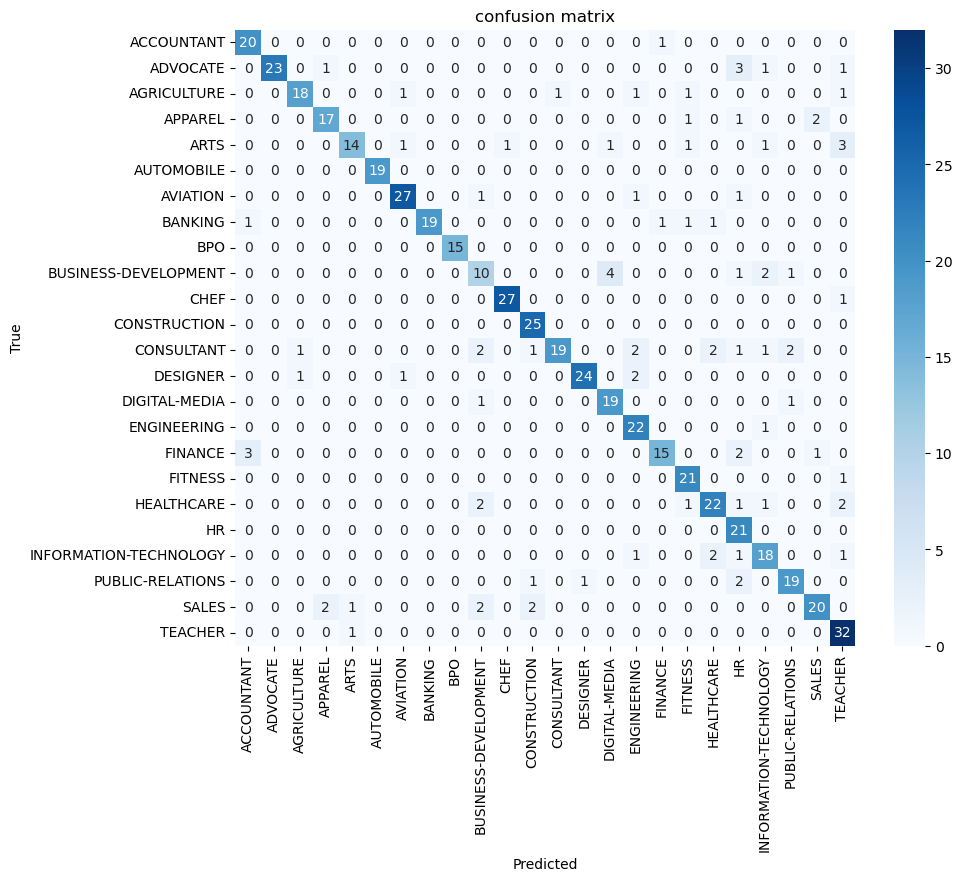

In [22]:
confustion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(confustion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_,yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('confusion matrix')
plt.show()


In [23]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [24]:
#example
resume_file = """esigner summary designer years product design manufacturing exhibit design visual merchandising comprehensive management logistics experience thrives"""

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


In [25]:
resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


In [27]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer_categorization.pkl','wb'))